In [1]:
%matplotlib inline

import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor

In [2]:
DATA_DIR = os.path.join('data')

print (DATA_DIR)

data


In [8]:
all_data = pd.read_csv(os.path.join(DATA_DIR,'merged_data.csv'), index_col='id')
all_data.shape

(9590, 323)

In [9]:
all_data = all_data.drop('orgs', axis=1)
all_data = all_data.drop('ownerName', axis=1)
all_data = all_data.drop('userType', axis=1)
all_data = all_data.drop('ownerType', axis=1)
all_data = all_data[all_data['Java'].notnull()]
all_data = all_data[all_data['publicRepos'].notnull()]
all_data.shape



(8394, 319)

In [10]:
#train_outcome = all_data[['stars']]
#train_features = all_data.drop('stars', axis=1)
features = all_data.drop('stars', axis=1)
outcome = np.ravel(all_data[['stars']])

In [11]:
scaler = MinMaxScaler()
model = RandomForestRegressor()
pipe = make_pipeline(scaler, model)
param_grid = { 'randomforestregressor__n_estimators':[100],
              'randomforestregressor__max_features':['auto'],
              'randomforestregressor__max_depth':[None],
              'randomforestregressor__min_samples_split':[4],
              'randomforestregressor__random_state':[11]
             }
grid = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error', n_jobs=6, cv=5)
grid.fit(features, outcome)
print(grid.best_params_)
print(grid.best_score_)
grid_preds = grid.predict(features)

{'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': 'auto', 'randomforestregressor__min_samples_split': 4, 'randomforestregressor__n_estimators': 100, 'randomforestregressor__random_state': 11}
-73360282.1565


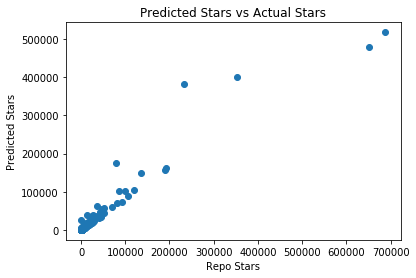

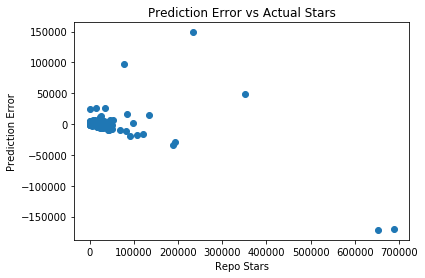

In [12]:
plt.scatter(outcome, grid_preds)
plt.title('Predicted Stars vs Actual Stars')
plt.xlabel("Repo Stars")
plt.ylabel("Predicted Stars")
plt.show()

plt.scatter(outcome, grid_preds - outcome)
plt.title('Prediction Error vs Actual Stars')
plt.xlabel("Repo Stars")
plt.ylabel("Prediction Error")
plt.show()

In [13]:
output = pd.DataFrame(data={'Actual Stars':outcome, 'Predicted Stars':grid_preds})
output

,Actual Stars,Predicted Stars
0,0.0,0.454810
1,0.0,0.018333
2,2.0,6.953595
3,116.0,112.843107
4,62.0,70.194087
5,15.0,12.943206
6,451.0,451.070937
7,73.0,70.183488
8,0.0,0.187111
9,6.0,11.517024


In [14]:
output.to_csv(os.path.join(DATA_DIR,'output.csv'))